# Life Insurance Cost Prediction

## Dataset: -
The dataset is retrieved from Machine Learning Website by Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6. The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

## Aim: -
The purposes of this exercise to look into different features to observe their relationship, and plot a regression model based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that will help medical insurance company to make decision on charging the premium

## Outline: -
Import Dataset
Data Cleaning and Data Preparation
Exploratory Data Analysis
Train Test Split
Model Building
Model Evaluation

In [1]:
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches


In [2]:
df = pd.read_csv("insurance.csv")
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

## Visualization dataset

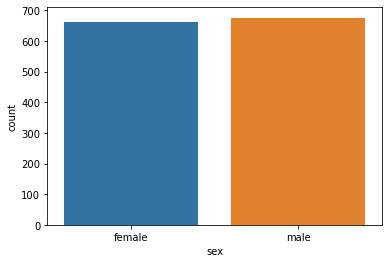

In [5]:
sns.countplot(x=df.sex)
plt.show()

Males and Females are equal in numbers

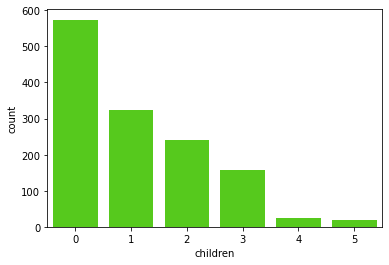

In [6]:
sns.countplot(x=df.children,color=[0.3,0.9,0.0])
plt.show()

Most indeviduals are alone

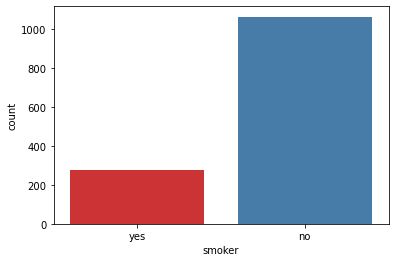

In [7]:
sns.countplot(x=df.smoker,palette='Set1')
plt.show()

Less people smoke

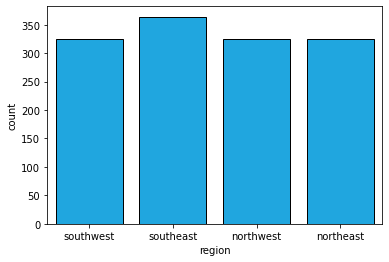

In [8]:
sns.countplot(x=df.region, edgecolor='black', color=[0.0,0.7,1.0])
plt.show()

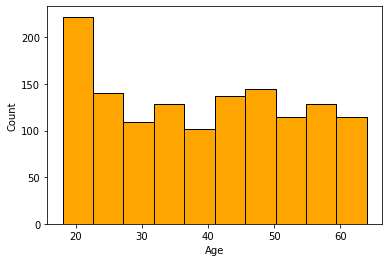

In [9]:
plt.hist(df.age, edgecolor='black', color='orange')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

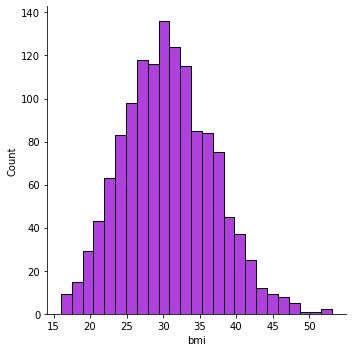

In [10]:
sns.displot(df.bmi, color='darkviolet')
plt.show()

Most people are healthy

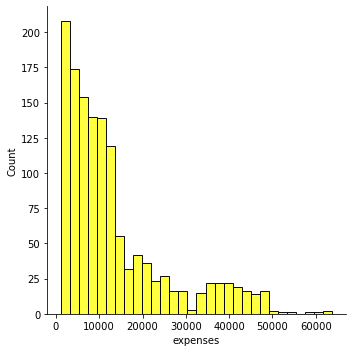

In [11]:
sns.displot(x=df.expenses, color='yellow')
plt.show()

## 3) exploring data

### statistical description:

In [12]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

### A) Question: Is there relationship between BMI and expenses amount?

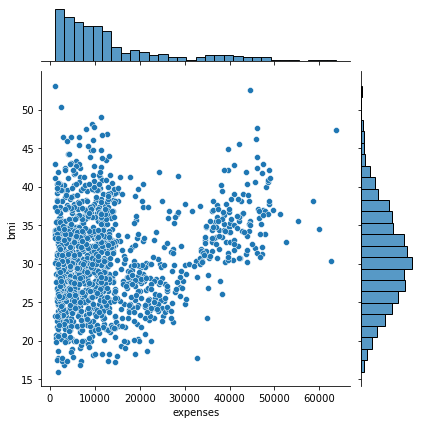

In [13]:
sns.jointplot(x=df["expenses"], y=df["bmi"], kind='scatter')

plt.show()

A) Answer: There are NO replationships between BMI and claim amount
### B) Question: Is there relationship between gender and claim amount?

<AxesSubplot:xlabel='sex', ylabel='expenses'>

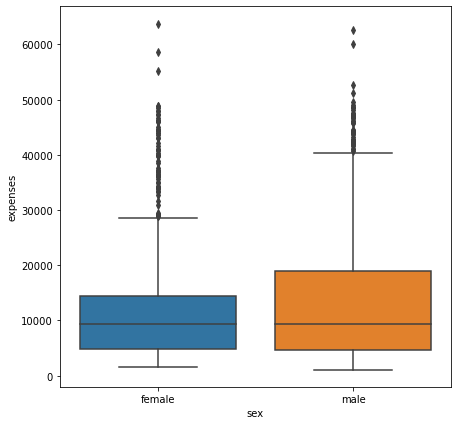

In [14]:
plt.figure(figsize = (7, 7))
sns.boxplot(x = 'sex', y = 'expenses',  data = df)

B) Answer: On average claims from male and female are the same with slightly bigger proportion of higher amounts for male
### C) Question: Is there relationship between region and claim amount?

<AxesSubplot:xlabel='region', ylabel='expenses'>

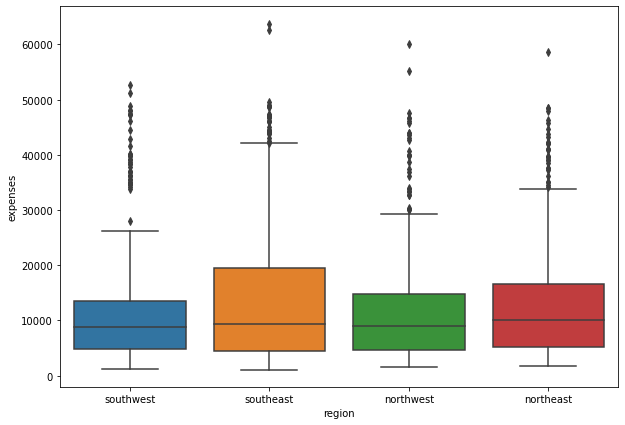

In [15]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'region', y = 'expenses',  data = df)

C) Answer: On average claims from regions are the same with slightly bigger proportion of higher amounts from Southeast
### D) Question: Is there relationships between claim amount between smokers and non-smokers?

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

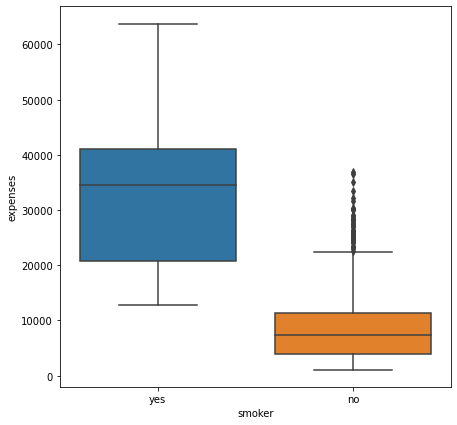

In [16]:
plt.figure(figsize = (7,7))
sns.boxplot(x = 'smoker', y = 'expenses',  data = df)

D) Answer: There is a strong replationship between smokers and non-smokers with claims from smokers being much higher
### D.i Question: is the smoker group well represented?

<AxesSubplot:xlabel='smoker', ylabel='count'>

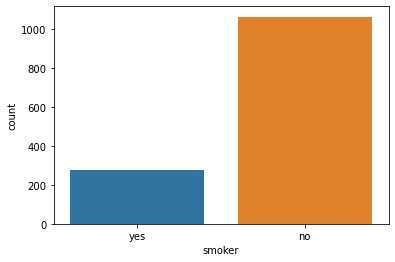

In [17]:
sns.countplot(x='smoker', data=df)


### E) Question: Is there relationship between claim amount and age?

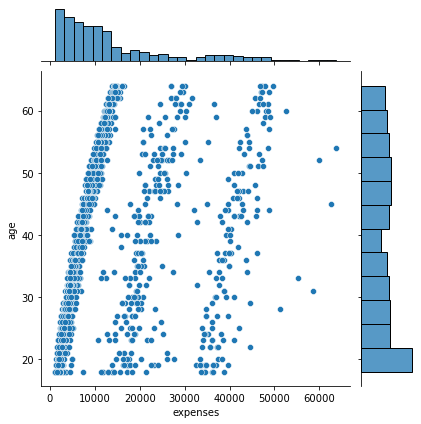

In [18]:
sns.jointplot(x=df["expenses"], y=df["age"], kind='scatter')

plt.show()

E) Answer: Claim amounts increase with age and tend to form groups around 1.2K, up to 3K, and more than 3K

### 4) understanding data

based on observations above let's bring several variables together to observe the difference

IMPACT OF SMOKING

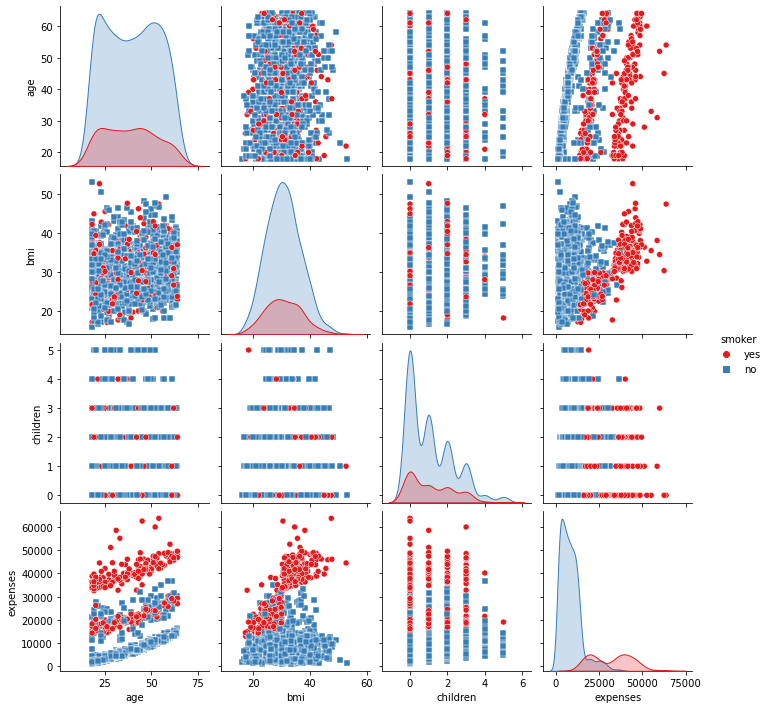

In [19]:
claim_pplot=df[['age', 'bmi', 'children', 'smoker', 'expenses']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "smoker" , markers=["o", "s"], palette="Set1")
plt.show()

## GENDER IMPACT

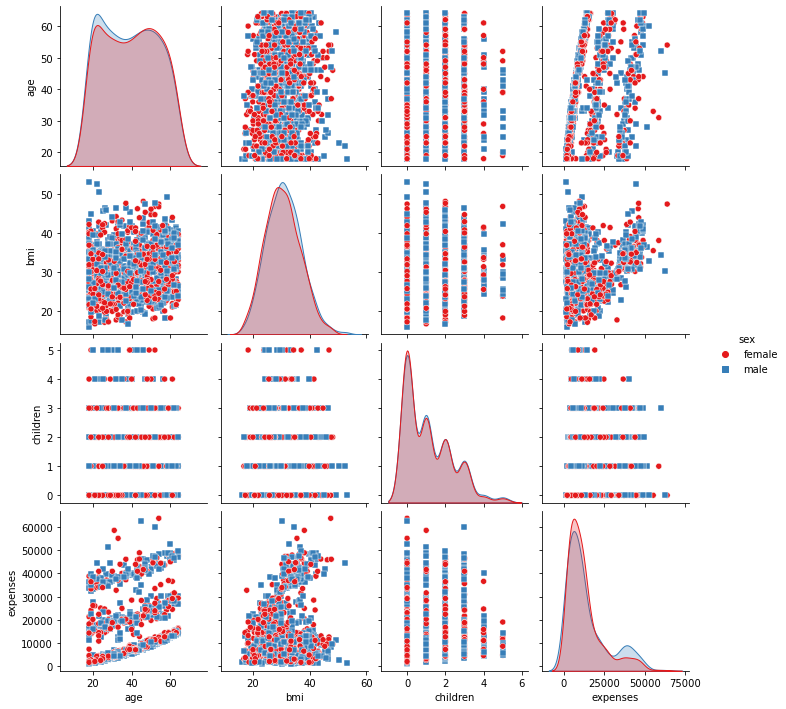

In [20]:
claim_pplot=df[['age', 'bmi', 'children', 'sex', 'expenses']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "sex" , markers=["o", "s"], palette="Set1")
plt.show()

### Summary: Gender has very little impact of the charges, other than being slightly lower.
## REGION IMPACT

In [21]:
claim_pplot=df[['age', 'bmi', 'children', 'region', 'expenses']]
claim_pplot.head()

age   bmi  children     region  expenses
0   19  27.9         0  southwest  16884.92
1   18  33.8         1  southeast   1725.55
2   28  33.0         3  southeast   4449.46
3   33  22.7         0  northwest  21984.47
4   32  28.9         0  northwest   3866.86

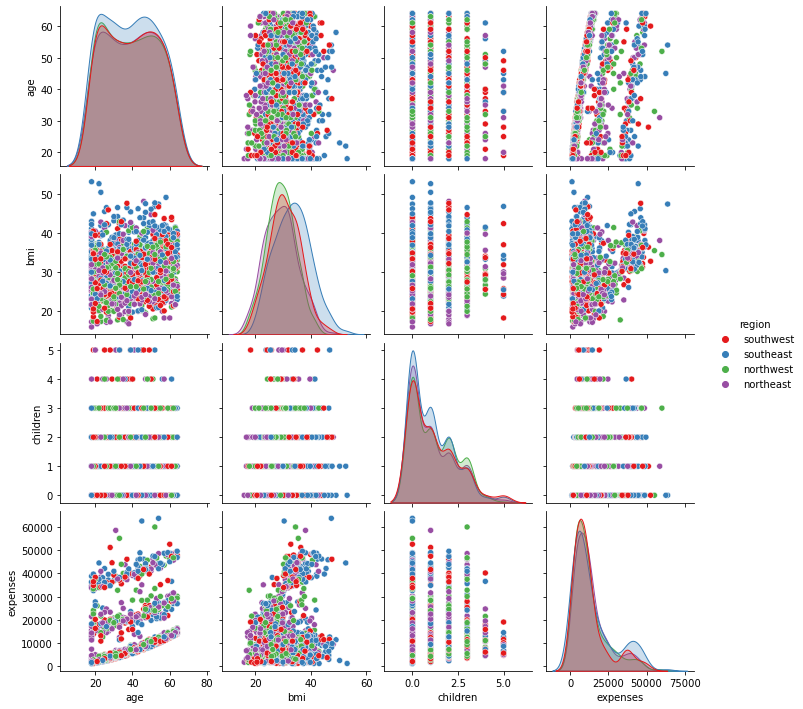

In [22]:
# sns.pairplot(claim_pplot, kind="scatter", hue = "region" , markers=["o", "s","x","+"], palette="Set1")
sns.pairplot(claim_pplot, kind="scatter", hue = "region" , palette="Set1")

# sns.pairplot(claim_pplot, kind="scatter", hue = "region" , palette=None)
# sns.pairplot(claim_pplot, kind="scatter", hue = "region" , markers=["o", "s"], palette="Set1")
plt.show()

### Summary: 

Region does have some imact on the charges; however we can see some trends as it relates to BMI

In [23]:
df[['age', 'sex','bmi', 'children', 'smoker', 'region', 'expenses']].corr()

age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000

In [24]:
#[['age', 'sex','bmi', 'children', 'smoker', 'region', 'charges']]
claim_corr = df[['age', 'sex','bmi', 'children', 'smoker', 'region', 'expenses']].corr()

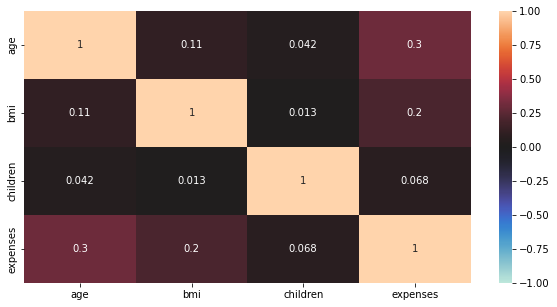

In [25]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

corr = df.corr()
ax = sns.heatmap(claim_corr,vmin=-1,vmax=1,center=0,annot=True)

<AxesSubplot:>

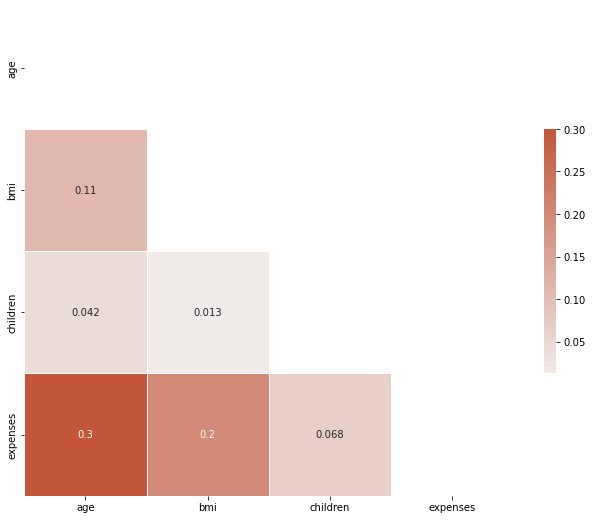

In [26]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(claim_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(claim_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

### Summary: 
    
The charges are highly affected by claimant being smocker on non-smocker. These smokers tend to have BMIs above average, 30. Region and gender might play some role in determening amount chared

## Converting categorical columns to numerical ones

In [27]:
#converting categorical columns to numerical ones
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df['sex'] = number.fit_transform(df['sex'].astype('str'))
df['smoker'] = number.fit_transform(df['smoker'].astype('str'))
df['region'] = number.fit_transform(df['region'].astype('str'))

df.head()

age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86

<AxesSubplot:>

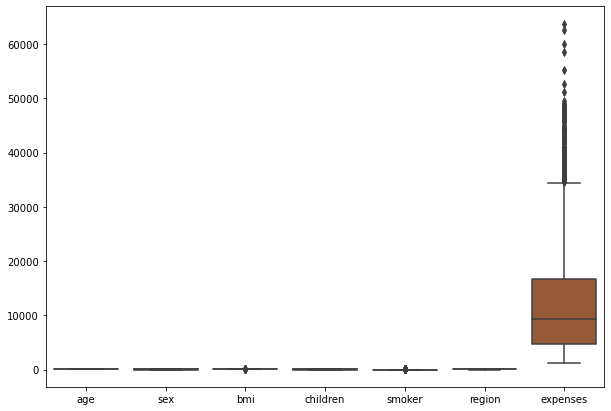

In [28]:
plt.figure(figsize = (10,7))

sns.boxplot(data=df, palette='Set1')
#checking for any outliers in the data

<AxesSubplot:>

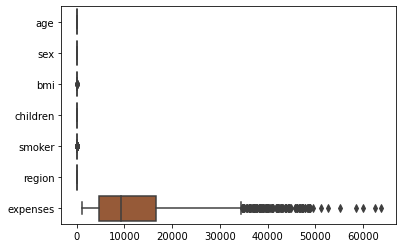

In [29]:
sns.boxplot(data=df,orient='h',palette='Set1')

<AxesSubplot:xlabel='bmi'>

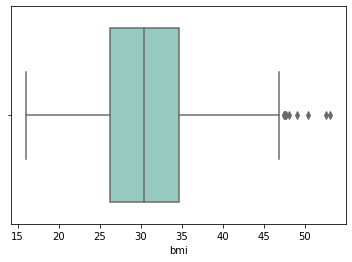

In [30]:
sns.boxplot(x=df['bmi'], palette='Set3')

<AxesSubplot:xlabel='expenses'>

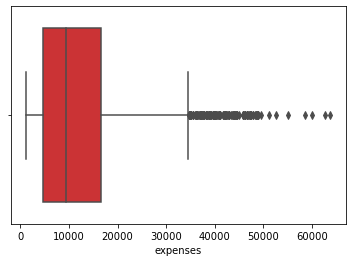

In [31]:
sns.boxplot(x=df['expenses'], palette='Set1')

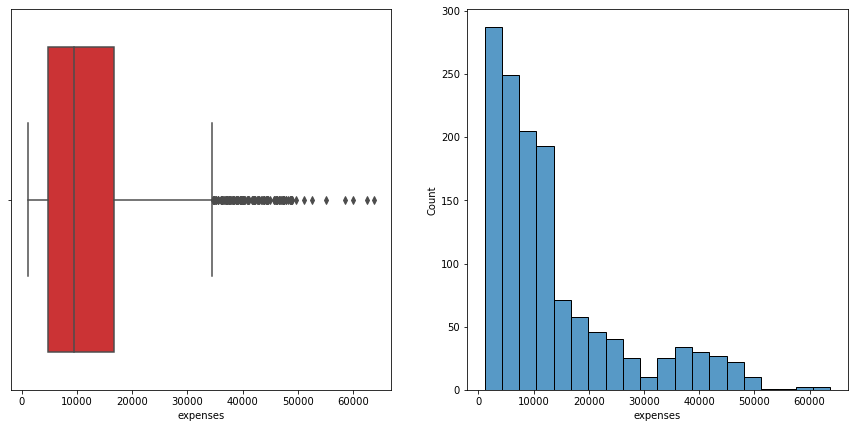

In [32]:
plt.subplots(figsize=(15,7))  

plt.subplot(1,2,1)         
# df_cpy['expenses'].plot.box()
sns.boxplot(x=df['expenses'], palette='Set1')

plt.subplot(1,2,2)      
# plt.hist(df_cpy['expenses'], bins=20)
sns.histplot(x=df['expenses'], bins=20, palette='Set1')

plt.show()

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.0000
sex             1.0000
bmi             8.4000
children        2.0000
smoker          0.0000
region          1.0000
expenses    11899.6275
dtype: float64


In [34]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

           age       sex       bmi  children    smoker    region  expenses
0     1.438764  1.010519  0.453646  0.908614  1.970587  1.343905  0.298583
1     1.509965  0.989591  0.514186  0.078767  0.507463  0.438495  0.953689
2     0.797954  0.989591  0.382954  1.580926  0.507463  0.438495  0.728675
3     0.441948  0.989591  1.306650  0.908614  0.507463  0.466915  0.719843
4     0.513149  0.989591  0.289606  0.908614  0.507463  0.466915  0.776802
...        ...       ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.054876  1.580926  0.507463  0.466915  0.220551
1334  1.509965  1.010519  0.202511  0.908614  0.507463  1.372326  0.914002
1335  1.509965  1.010519  1.022707  0.908614  0.507463  0.438495  0.961597
1336  1.296362  1.010519  0.798128  0.908614  0.507463  1.343905  0.930361
1337  1.551686  1.010519  0.256799  0.908614  1.970587  0.466915  1.311053

[1338 rows x 7 columns]


In [35]:
threshold = 3
print(np.where(z > 3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [36]:
df=df[(z < 3).all(axis = 1)]

In [37]:
df.shape

(1309, 7)

In [38]:
df.corr()
#finding the correlation between different variables/features

age       sex       bmi  children    smoker    region  expenses
age       1.000000 -0.019253  0.118232  0.059100 -0.029090  0.003121  0.305263
sex      -0.019253  1.000000  0.042513  0.014056  0.079058  0.003084  0.059455
bmi       0.118232  0.042513  1.000000  0.029843 -0.005072  0.159986  0.191691
children  0.059100  0.014056  0.029843  1.000000  0.028844 -0.002976  0.100438
smoker   -0.029090  0.079058 -0.005072  0.028844  1.000000 -0.003474  0.785129
region    0.003121  0.003084  0.159986 -0.002976 -0.003474  1.000000 -0.007633
expenses  0.305263  0.059455  0.191691  0.100438  0.785129 -0.007633  1.000000

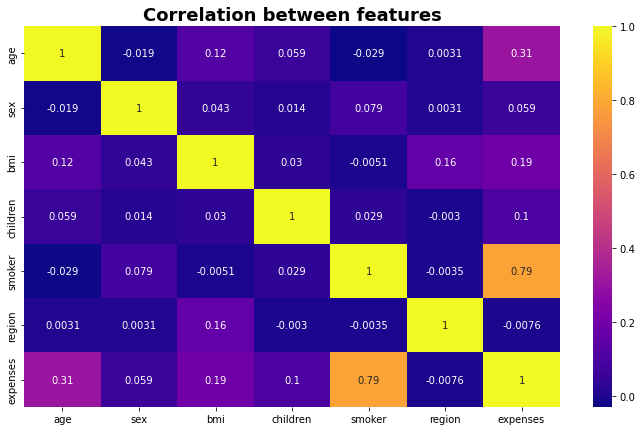

In [39]:
train_corr=df.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(train_corr,cmap='plasma',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

#plotting the heatmap for different features

## Feature Selection

In [40]:
X = df.drop('expenses', axis = 1)
y = df['expenses']

In [41]:
X

age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       3
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       1
4      32    1  28.9         0       0       1
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       1
1334   18    0  31.9         0       0       0
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       3
1337   61    0  29.1         0       1       1

[1309 rows x 6 columns]

In [42]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1309, dtype: float64

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = np.round(df['expenses'])

#Apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

Specs        Score
0       age  6560.637406
1       sex   639.726950
2       bmi  1487.490886
3  children  1558.591009
4    smoker  1039.060377
5    region  1036.401488

In [44]:
print(featureScores.nlargest(4,'Score')) #print 4 best features

      Specs        Score
0       age  6560.637406
3  children  1558.591009
2       bmi  1487.490886
4    smoker  1039.060377


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [46]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.34020982 0.01396544 0.43844493 0.090239   0.02469934 0.09244147]


## Modelling and Prediction

### Splitting the dataset

In [47]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 6)
(1047,)
(262, 6)
(262,)


## Predictive Modelling
Predictive modeling is a powerful way to add intelligence to your application. It enables applications to predict outcomes against new data. The act of incorporating predictive analytics into your applications involves two major phases: model training and model deployment.

## Linear Regression
Linear regression is a basic and commonly used type of predictive analysis.The overall idea of regression is to examine two things:

    (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?

    (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_train)

# calculating the accuracies
print("Training Accuracy :",model.score(X_train,y_train)*100)
print("Testing Accuracy :",model.score(X_test,y_test)*100)

Training Accuracy : 74.17815630731333
Testing Accuracy : 78.92469131446109


In [49]:
from sklearn.metrics import mean_squared_error,r2_score
print("Model Accuracy",r2_score(y,model.predict(X))*100)

Model Accuracy 75.27247917107731


In [50]:
fig = px.scatter(x = y_train, y = y_predict, color_discrete_sequence=['hotpink'], trendline="ols")
fig.update_layout(title='Training Predicted Vs Actual values')
fig.show()

<IPython.core.display.Javascript object>

## Random Forest
Random forest is like bootstrapping algorithm with Decision tree (CART) model. Say, we have 1000 observation in the complete population with 10 variables. Random forest tries to build multiple CART models with different samples and different initial variables. For instance, it will take a random sample of 100 observation and 5 randomly chosen initial variables to build a CART model. It will repeat the process (say) 10 times and then make a final prediction on each observation. Final prediction is a function of each prediction. This final prediction can simply be the mean of each prediction.

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict = rfr.predict(X_train)

# calculating the accuracies
print("Training Accuracy :",rfr.score(X_train,y_train)*100)
print("Testing Accuracy :",rfr.score(X_test,y_test)*100)

Training Accuracy : 97.49167334459337
Testing Accuracy : 86.37278403264604


In [52]:
from sklearn.metrics import mean_squared_error,r2_score
print("Model Accuracy",r2_score(y,rfr.predict(X))*100)

Model Accuracy 94.97258910526767


In [53]:
fig = px.scatter(x = y_train, y = y_predict,color_discrete_sequence=['darkblue'], trendline="ols")
fig.update_layout(title='Training Predicted Vs Actual values')
fig.show()

<IPython.core.display.Javascript object>

## XGBoost

### What is the XGBoost algorithm?
XGBoost is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed.

### What is XGBoost and how does it work?
XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

### What is the use of XGBoost?
XGBoost is a tree based ensemble machine learning algorithm which is a scalable machine learning system for tree boosting. XGBoost stands for Extreme Gradient Boosting. It uses more accurate approximations to find the best tree model.

In [54]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_predict = xgb.predict(X_train)

# calculating the accuracies
print("Training Accuracy :",xgb.score(X_train,y_train)*100)
print("Testing Accuracy :",xgb.score(X_test,y_test)*100)

Training Accuracy : 99.48050796842828
Testing Accuracy : 83.93165180651005


In [55]:
fig = px.scatter(x = y_train, y = y_predict, color_discrete_sequence=['crimson '], trendline="ols")
fig.update_layout(title='Training Predicted Vs Actual values')
fig.show()

<IPython.core.display.Javascript object>

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
print("Model Accuracy",r2_score(y,xgb.predict(X))*100)

Model Accuracy 95.95566900202087


## LightGBM

### What is LightGBM used for?
Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks

### Why LightGBM is fast?
There are three reasons why LightGBM is fast: Histogram based splitting. Gradient-based One-Side Sampling (GOSS) Exclusive Feature Bundling (EFB)

In [57]:
!pip install lightgbm

In [58]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train,y_train)
y_predict = lgbm.predict(X_train)

# calculating the accuracies
print("Training Accuracy :",lgbm.score(X_train,y_train)*100)
print("Testing Accuracy :",lgbm.score(X_test,y_test)*100)

Training Accuracy : 93.73209359394852
Testing Accuracy : 86.39549648166036


In [59]:
from sklearn.metrics import mean_squared_error,r2_score
print("Model Accuracy",r2_score(y,lgbm.predict(X))*100)

Model Accuracy 92.07317254333319


In [60]:
fig = px.scatter(x = y_train, y = y_predict, color_discrete_sequence=['orange'], trendline="ols")
fig.update_layout(title='Training Predicted Vs Actual values')
fig.show()

<IPython.core.display.Javascript object>

## Prediction on Test Data

In [61]:
# test=pd.read_csv('../input/insurance-cost-prediction/test.csv')
# #test contains the file information  which is in csv format

# test.head()

In [62]:
# test.shape
# shape of the dataframe ie no. of rows and columns

In [63]:
# # Checking for missing values
# test.isna().sum()

In [64]:
# test['sex'] = number.fit_transform(test['sex'].astype('str'))
# test['smoker'] = number.fit_transform(test['smoker'].astype('str'))
# test['region'] = number.fit_transform(test['region'].astype('str'))

# test.head()

In [65]:
# #Using random forest algorithm
# y_pred =rfr.predict(test)
# test['charges'] = y_pred

In [66]:
# test.head()

## Submission File

In [67]:
# submission = test.drop(['age','sex','bmi','children','smoker','region'],axis=1)
# submission

In [68]:
# submission.to_csv('submit.csv',index=False)
# https://www.kaggle.com/code/vaishnavikhilari/insurance-cost-prediction